In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_excel('/content/drive/MyDrive/ECON 540 Team B/ASO/Data/aso_master1.xlsx')

In [ ]:
df.groupby('season')['num_seats'].sum()

,num_seats
season,
2022-23,62262
2023-24,67667


In [3]:
pure_single = df[(df['ticket_type']=='Single Ticket') & (df['add_on']==0)]

In [12]:
pure_single[(pure_single['Type']== 'Premium') & (pure_single['price_section'] == 'Middle Orchestra')].groupby('season')['purchase_price'].mean()

,purchase_price
season,
2022-23,87.573248
2023-24,89.644231


In [11]:
pure_single[(pure_single['Name']== 'Orff: Carmina Burana') & (pure_single['price_section'] == 'Middle Orchestra')]['purchase_price'].mean()

88.82352941176471

In [ ]:
pure_single.groupby('season')['event_name'].count()

,event_name
season,
2022-23,14483
2023-24,16674


In [ ]:
pure_single.groupby('season')['num_seats'].sum()

,num_seats
season,
2022-23,30476
2023-24,35022


In [ ]:
pivot_table = pd.pivot_table(
    pure_single,
    values='purchase_price',
    index='Type',
    columns='season',
    aggfunc='mean'  # Use 'mean' to calculate average purchase price
)

pivot_table = pivot_table.rename(
    columns={'2022-23': '2022-23 Season', '2023-24': '2023-24 Season'}
)

print(pivot_table)

season     2022-23 Season  2023-24 Season
Type                                     
Classical       49.340004       57.007435
Holiday         55.858706       56.437045
Premium         66.953847       68.703668
Special         52.310606       81.831516


In [ ]:
pure_single23 = pure_single[pure_single['season']=='2022-23']
pure_single24 = pure_single[pure_single['season']=='2023-24']

In [ ]:
df[(df['ticket_type']=='Subscription')].groupby('season')['acct_id'].nunique()

,acct_id
season,
2022-23,2608
2023-24,2573


In [ ]:
df[(df['ticket_type']=='Subscription')].groupby(['season', 'Type'])['num_seats'].sum()

season   Type     
2022-23  Classical    22025
         Premium       7413
2023-24  Classical    23209
         Premium       6218
Name: num_seats, dtype: int64

In [ ]:
# Assuming 'df' is your DataFrame from the previous code

def assign_subscription_type(subscriber_type):
    if pd.isna(subscriber_type):
        return None  # Handle missing values
    subscriber_type = str(subscriber_type).lower() #convert to lower case
    if "established" in subscriber_type:
        return "Established"
    elif "freshman" in subscriber_type:
        return "Freshman"
    elif "sophomore" in subscriber_type:
        return "Sophomore"
    elif "lapsed" in subscriber_type:
        return "Lapsed"
    elif "cyo" and "discount" in subscriber_type:
        return "CYO Discount"
    elif "cyo" in subscriber_type:
        return "CYO"
    else:
        return None  # Handle cases that don't match any criteria

df['Subscription_type'] = df['subscriber_type'].apply(assign_subscription_type)
df['Subscription_type'].unique()

array(['CYO', 'Sophomore', 'Established', None, 'Lapsed', 'Freshman',
       'CYO Discount'], dtype=object)

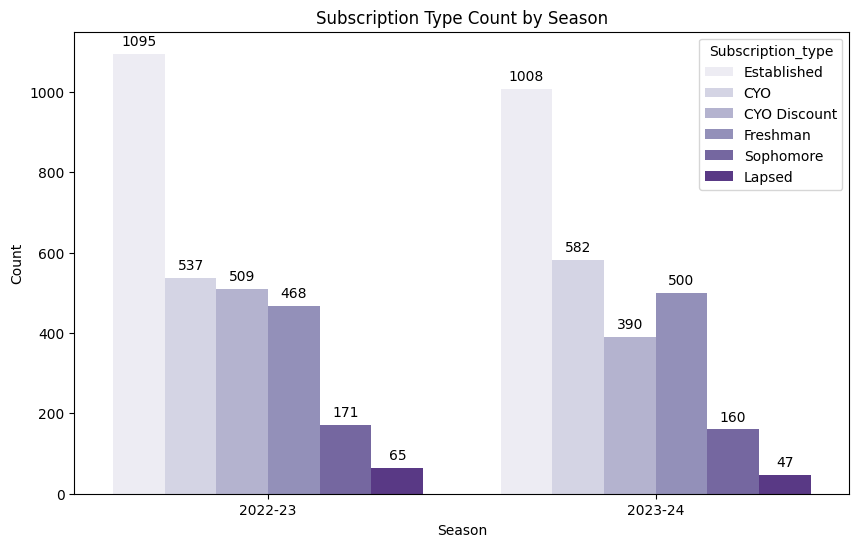

In [ ]:
# Filter for add_on == 0
filtered_df = df[df['add_on'] == 0]

# Group by 'Season' and 'Subscription_type', then count occurrences
subscription_season_summary = filtered_df.groupby(['season', 'Subscription_type'])['acct_id'].nunique().reset_index().sort_values(by='acct_id', ascending=False)

# Rename the 'acct_id' column to 'count'
subscription_season_summary.rename(columns={'acct_id': 'count'}, inplace=True)

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='season', y='count', hue='Subscription_type', data=subscription_season_summary, palette='Purples'
)
plt.title('Subscription Type Count by Season')
plt.xlabel('Season')
plt.ylabel('Count')
# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(format(height, '.0f'),
                  (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center',
                  xytext = (0, 9),
                  textcoords = 'offset points')

plt.show()

In [ ]:
df.groupby('subscriber_type')['acct_id'].nunique().sort_values(ascending=False)

,acct_id
subscriber_type,
Fixed Established Subscription 6 Concert,844
CYO Subscription,711
Discounted CYO Subscription,642
Fixed Freshman Subscription 6 Concert,424
Fixed Established Subscription Sunday,170
Fixed Freshman Subscription Sunday,162
Fixed Sophomore Subscription 6 Concert,122
Fixed Established Subscription 12 Concert,74
Fixed Established Subscription 24 Concert,71


In [ ]:
pure_single24.groupby('Type')['paid_amount'].sum()

,paid_amount
Type,
Classical,1029312.85
Holiday,519530.40
Premium,381769.75
Special,185012.00


In [ ]:
pivot_table = pd.pivot_table(
    pure_single,
    values='purchase_price',
    index='Type',
    columns=['price_section', 'season'],
    aggfunc='mean'  # Use 'mean' to calculate average purchase price
)

pivot_table = pivot_table.rename(
    columns={'2022-23': '2022-23 Season', '2023-24': '2023-24 Season'}
)

pivot_table.columns = pivot_table.columns.map('_'.join)
df_pivot = pivot_table.reset_index() #Resets the index
df_pivot #Prints the dataframe

,Type,Dress Circle_2022-23 Season,Dress Circle_2023-24 Season,Front Balcony_2022-23 Season,Front Balcony_2023-24 Season,Front Loge_2022-23 Season,Front Loge_2023-24 Season,Front Orchestra_2022-23 Season,Front Orchestra_2023-24 Season,Main Orchestra_2022-23 Season,...,Middle Orchestra_2022-23 Season,Middle Orchestra_2023-24 Season,On Stage_2023-24 Season,Pit_2023-24 Season,Premium Orchestra_2022-23 Season,Premium Orchestra_2023-24 Season,Rear Balcony_2022-23 Season,Rear Balcony_2023-24 Season,Rear Orchestra_2022-23 Season,Rear Orchestra_2023-24 Season
0,Classical,50.390497,56.457903,36.435514,39.943289,101.689889,110.548387,31.704273,39.640614,50.187873,...,68.816959,79.190347,NaN,NaN,91.750654,106.371248,24.162282,27.979592,40.234878,44.814698
1,Holiday,44.897727,49.715038,29.029730,37.283708,69.720043,76.073795,60.328497,63.562044,NaN,...,54.694545,59.256410,NaN,NaN,84.782731,74.871212,19.879195,27.101983,44.618304,48.761905
2,Premium,63.888973,68.172414,47.002264,51.396226,124.538860,126.895028,48.310734,52.456284,67.189533,...,87.661972,89.344086,NaN,NaN,120.262443,116.616667,36.618363,39.054176,54.466498,57.239645
3,Special,42.000000,73.465753,30.517241,56.628866,69.852941,110.938596,37.727273,93.763636,NaN,...,68.243243,80.577982,103.27907,98.302326,76.720000,107.191083,21.153846,57.678571,41.268657,59.974359


In [ ]:
print(pure_single[pure_single['Name']=='Josh Bell with the ASO'].groupby('price_section').purchase_price.mean())

price_section
Dress Circle         104.000000
Front Balcony         82.571429
Front Loge           168.200000
Front Orchestra      166.523810
Middle Loge          132.750000
Middle Orchestra      99.540541
Pit                  218.200000
Premium Orchestra    164.490196
Rear Balcony          78.777778
Rear Orchestra        79.232558
Name: purchase_price, dtype: float64


In [ ]:
df[(df['season']=='2023-24') & (df['price_code_type']=='Fixed Established Subscription 6 Concert') & (df['ticket_type'] == 'Subscription')]['paid_amount'].sum()

567651.5

In [ ]:
df.groupby(['season', 'subscriber_type'])['acct_id'].nunique().sort_values(ascending=False).head(20)

season   subscriber_type                          
2022-23  Fixed Established Subscription 6 Concert     769
2023-24  Fixed Established Subscription 6 Concert     734
         CYO Subscription                             582
2022-23  CYO Subscription                             541
         Discounted CYO Subscription                  509
2023-24  Discounted CYO Subscription                  392
         Fixed Freshman Subscription 6 Concert        321
2022-23  Fixed Freshman Subscription 6 Concert        312
         Fixed Established Subscription Sunday        162
2023-24  Fixed Established Subscription Sunday        131
         Fixed Freshman Subscription Sunday           126
2022-23  Fixed Freshman Subscription Sunday           116
         Fixed Sophomore Subscription 6 Concert       104
2023-24  Fixed Sophomore Subscription 6 Concert        98
2022-23  Fixed Established Subscription 12 Concert     74
         Fixed Established Subscription 24 Concert     70
2023-24  Fixed Established Subscription 12 Concert     67
         Fixed Established Subscription 24 Concert     60
2022-23  Fixed Sophomore  Subscription Sunday          45
2023-24  Fixed Sophomore  Subscription Sunday          42
Name: acct_id, dtype: int64

In [ ]:
addon = df[df['price_code'].str.endswith('AO')]

In [ ]:
addon.groupby(['season', 'subscriber_type'])['num_seats'].sum().sort_values(ascending=False)

season   subscriber_type                          
2023-24  Fixed Established Subscription 6 Concert     834
         CYO Subscription                             750
2022-23  Fixed Established Subscription 6 Concert     731
         CYO Subscription                             479
2023-24  Fixed Freshman Subscription 6 Concert        285
         Discounted CYO Subscription                  183
2022-23  Fixed Established Subscription 12 Concert    178
2023-24  Fixed Established Subscription 12 Concert    177
2022-23  Fixed Freshman Subscription 6 Concert        162
2023-24  Fixed Established Subscription Sunday        158
         Fixed Established Subscription 24 Concert    142
2022-23  Fixed Sophomore Subscription 6 Concert       124
         Fixed Established Subscription Sunday        118
2023-24  Fixed Freshman Subscription Sunday           103
2022-23  Discounted CYO Subscription                   89
         Fixed Established Subscription 24 Concert     85
         Fixed Freshman Subscription Sunday            85
2023-24  Fixed Sophomore Subscription 6 Concert        80
         Fixed Sophomore  Subscription Sunday          48
         Fixed Established Subscription 18 Concert     47
2022-23  Fixed Established Subscription 18 Concert     41
2023-24  Fixed Freshman Subscription 24 Concert        37
2022-23  Fixed Sophomore  Subscription Sunday          37
2023-24  Fixed Upgrade Subscription 18 Concert         33
         Fixed Sophomore Subscription 12 Concert       24
         Fixed Lapsed Subscription 6 Concert           22
2022-23  Fixed Upgrade Subscription 6 Concert          18
2023-24  Fixed Freshman Subscription 12 Concert        17
2022-23  Fixed Sophomore Subscription 24 Concert       13
2023-24  Fixed Lapsed Subscription Sunday              13
2022-23  Fixed Lapsed Subscription 6 Concert           13
2023-24  Fixed Freshman Subscription 18 Concert        12
         Fixed Upgrade Subscription 6 Concert          12
2022-23  Fixed Lapsed Subscription Sunday              11
         Fixed Freshman Subscription 24 Concert        11
2023-24  Fixed Sophomore Subscription 24 Concert       10
         Fixed Chorus Subscription 6 Concert            9
2022-23  Fixed Upgrade Subscription 12 Concert          9
2023-24  Fixed Chorus Subscription 12 Concert           7
2022-23  Fixed Sophomore Subscription 12 Concert        7
2023-24  Wheelchair                                     6
2022-23  Wheelchair                                     4
         Fixed Upgrade Subscription 18 Concert          4
2023-24  Fixed Upgrade Subscription 12 Concert          4
2022-23  Fixed Musician Subscription 6 Concert          3
2023-24  Fixed Upgrade Subscription 24 Concert          3
2022-23  Fixed Chorus Subscription 12 Concert           2
         Fixed Upgrade Subscription Sunday              2
         Fixed Upgrade Subscription 24 Concert          2
2023-24  Fixed Musician Subscription 18 Concert         2
         Fixed Musician Subscription 6 Concert          2
2022-23  Fixed Freshman Subscription 18 Concert         2
         Fixed Lapsed Subscription 24 Concert           1
         Fixed Freshman Subscription 12 Concert         1
2023-24  Fixed Upgrade Subscription Sunday              1
Name: num_seats, dtype: int64

In [ ]:
addon.groupby(['season', 'subscriber_type'])['acct_id'].nunique().sort_values(ascending=False)

season   subscriber_type                          
2023-24  Fixed Established Subscription 6 Concert     268
2022-23  Fixed Established Subscription 6 Concert     231
2023-24  CYO Subscription                             204
2022-23  CYO Subscription                             152
2023-24  Fixed Freshman Subscription 6 Concert         93
         Discounted CYO Subscription                   51
2022-23  Fixed Freshman Subscription 6 Concert         46
         Fixed Established Subscription 12 Concert     43
2023-24  Fixed Established Subscription 12 Concert     43
         Fixed Established Subscription Sunday         43
2022-23  Fixed Established Subscription Sunday         38
         Fixed Sophomore Subscription 6 Concert        36
2023-24  Fixed Established Subscription 24 Concert     33
         Fixed Freshman Subscription Sunday            31
         Fixed Sophomore Subscription 6 Concert        30
2022-23  Fixed Established Subscription 24 Concert     26
         Fixed Freshman Subscription Sunday            24
         Discounted CYO Subscription                   23
2023-24  Fixed Sophomore  Subscription Sunday          14
         Fixed Established Subscription 18 Concert     13
2022-23  Fixed Sophomore  Subscription Sunday          11
2023-24  Fixed Freshman Subscription 24 Concert        11
2022-23  Fixed Established Subscription 18 Concert     11
2023-24  Fixed Lapsed Subscription 6 Concert            8
         Fixed Sophomore Subscription 12 Concert        8
2022-23  Fixed Lapsed Subscription 6 Concert            7
2023-24  Fixed Freshman Subscription 12 Concert         6
2022-23  Fixed Upgrade Subscription 6 Concert           5
2023-24  Fixed Upgrade Subscription 6 Concert           5
         Fixed Chorus Subscription 12 Concert           4
2022-23  Fixed Lapsed Subscription Sunday               4
         Fixed Sophomore Subscription 12 Concert        4
2023-24  Fixed Lapsed Subscription Sunday               3
         Fixed Sophomore Subscription 24 Concert        3
2022-23  Fixed Freshman Subscription 24 Concert         3
         Fixed Sophomore Subscription 24 Concert        3
         Fixed Musician Subscription 6 Concert          2
2023-24  Fixed Upgrade Subscription 12 Concert          2
2022-23  Fixed Freshman Subscription 18 Concert         2
         Wheelchair                                     2
2023-24  Wheelchair                                     2
         Fixed Freshman Subscription 18 Concert         2
2022-23  Fixed Upgrade Subscription 12 Concert          1
2023-24  Fixed Musician Subscription 18 Concert         1
         Fixed Musician Subscription 6 Concert          1
2022-23  Fixed Lapsed Subscription 24 Concert           1
         Fixed Upgrade Subscription 18 Concert          1
         Fixed Chorus Subscription 12 Concert           1
         Fixed Upgrade Subscription 24 Concert          1
         Fixed Upgrade Subscription Sunday              1
2023-24  Fixed Upgrade Subscription 18 Concert          1
         Fixed Upgrade Subscription 24 Concert          1
2022-23  Fixed Freshman Subscription 12 Concert         1
2023-24  Fixed Upgrade Subscription Sunday              1
         Fixed Chorus Subscription 6 Concert            1
Name: acct_id, dtype: int64

This is an example of changing of the demand and purchase price and then calculating the new revenue. Basically, you would create a new num_seats variable and new purchase_price variable for the show and compare it with their actual amount. We would want to come up with a range of gains in revenue so they can in the demand change for the new program.

In [ ]:
# original amount of revenue
addon[addon['Type']=='Premium']['paid_amount'].sum()

63609.0

In [ ]:
addon['jb_num_seats'] = addon[addon['Type'] =='Premium']['num_seats'] * 1.15

In [ ]:
addon['jb_purchase_price'] = addon[addon['Type'] =='Premium']['purchase_price'] * 1.075

In [ ]:
addon['new_paid_amount'] = addon['jb_num_seats'] * addon['jb_purchase_price']

In [ ]:
addon['new_paid_amount'].sum()

78624.26374999998

In [ ]:
addon[addon['Type']=='Holiday']['paid_amount'].sum()

68238.33

In [ ]:
addon['christmas_num_seats'] = df[df['Name']=='Christmas with the ASO']['num_seats'] * 0.95

In [ ]:
addon['christmas_purchase_price'] = df[df['Name']=='Christmas with the ASO']['purchase_price'] * 1.1

In [ ]:
addon['new_christmas_paid_amount'] = df[df['Name']=='Christmas with the ASO']['christmas_num_seats'] * df[df['Name']=='Christmas with the ASO']['christmas_purchase_price']

In [ ]:
addon['new_christmas_paid_amount'].sum()

680120.5895000001

In [ ]:
df[(df['Type']=='Special')& (df['ticket_type']=='Single Ticket') & (df['add_on']==0)]['paid_amount'].sum()

250489.0

In [ ]:
df['prem_num_seats'] = df[(df['Type']=='Special')& (df['ticket_type']=='Single Ticket') & (df['add_on']==0)]['num_seats'] * 1.15

In [ ]:
df['prem_purchase_price'] = df[(df['Type']=='Special')& (df['ticket_type']=='Single Ticket') & (df['add_on']==0)]['purchase_price'] * 0.90

In [ ]:
df['prem_paid_amount'] = df['prem_num_seats'] * df['prem_purchase_price']

In [ ]:
df['prem_paid_amount'].sum()

259256.115

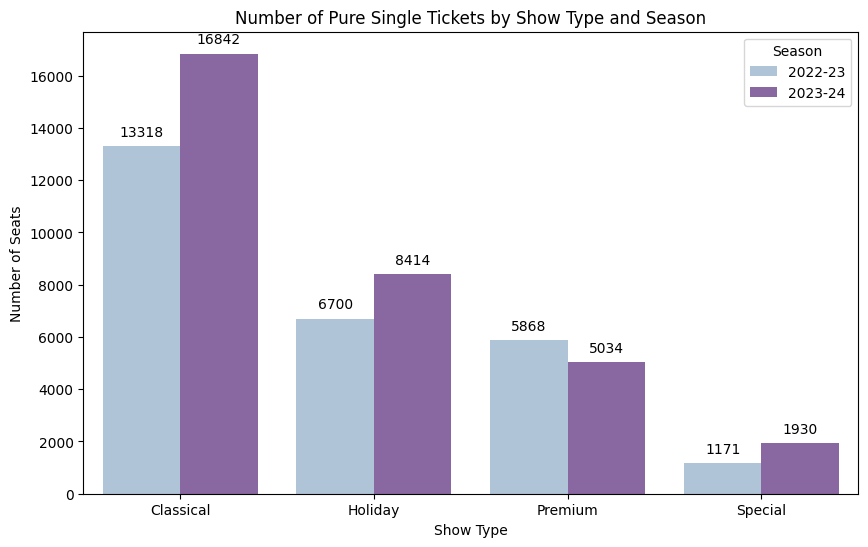

In [ ]:
grouped = df[(df['price_code'].str.endswith('*'))].groupby(['season','Type'])['num_seats'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x='Type', y='num_seats', data = grouped, hue='season', palette='BuPu')
plt.title('Number of Pure Single Tickets by Show Type and Season')
plt.xlabel('Show Type')
plt.ylabel('Number of Seats')
plt.legend(title='Season')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(format(int(height)), # Convert height to int before formatting
                  (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

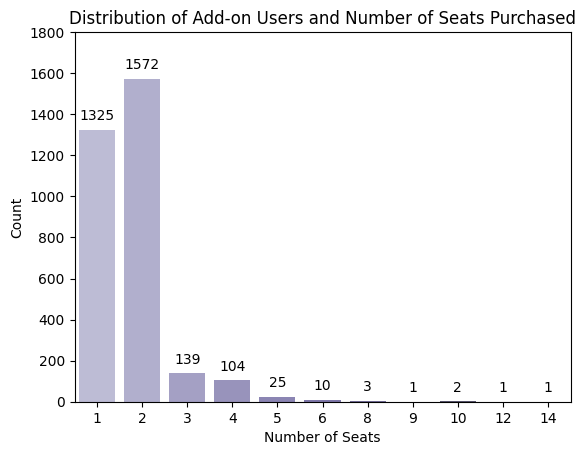

In [ ]:
ax = sns.countplot(x='num_seats', data=addon, palette='Purples_d')
plt.title('Distribution of Add-on Users and Number of Seats Purchased')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.ylim(0,1800)

for p in ax.patches:
    ax.annotate(format(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

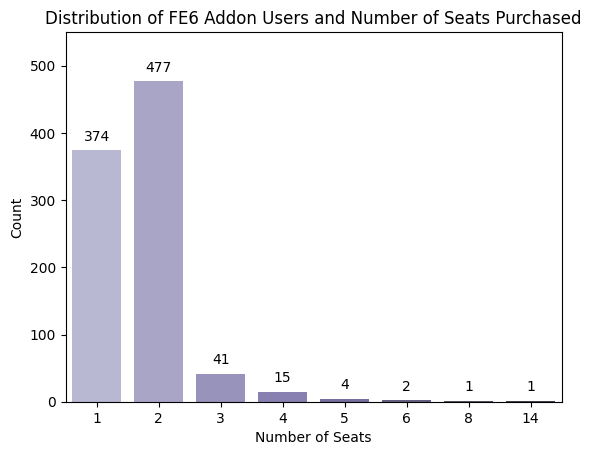

In [ ]:
fe6_addon = addon[(addon['subscriber_type']=='Fixed Established Subscription 6 Concert')]
ax = sns.countplot(x='num_seats', data=fe6_addon, palette='Purples_d')
plt.title('Distribution of FE6 Addon Users and Number of Seats Purchased')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.ylim(0,550)

for p in ax.patches:
    ax.annotate(format(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

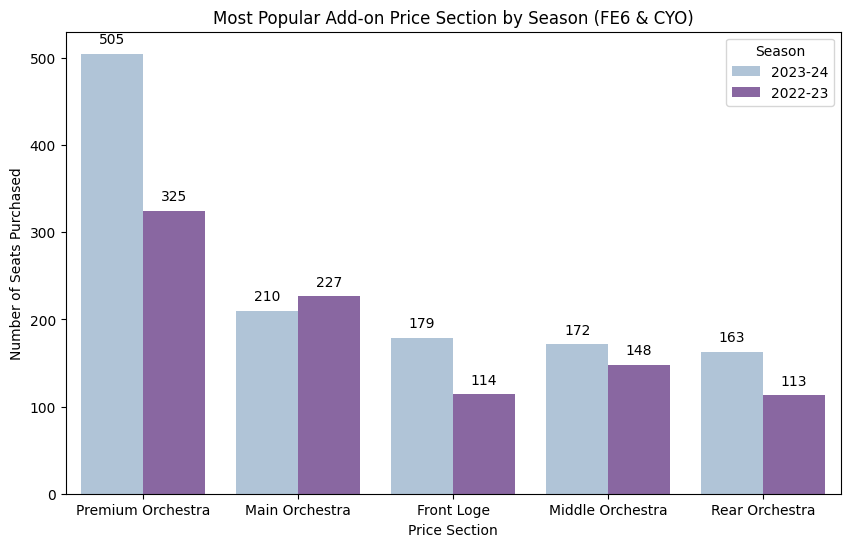

In [ ]:
grouped_data = addon[addon['subscriber_type'].isin(['Fixed Established Subscription 6 Concert', 'CYO Subscription'])].groupby(['price_section', 'season'])['num_seats'].agg('sum').sort_values(ascending=False).head(10).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x='price_section', y='num_seats', data = grouped_data, hue='season', palette='BuPu')
plt.title('Most Popular Add-on Price Section by Season (FE6 & CYO)')
plt.xlabel('Price Section')
plt.ylabel('Number of Seats Purchased')
plt.legend(title='Season')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(format(int(height)), # Convert height to int before formatting
                  (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')


In [ ]:
addon.groupby(['season', 'Type'])['num_seats'].sum()

season   Type     
2022-23  Classical     958
         Holiday       472
         Premium       483
         Special       435
2023-24  Classical    1109
         Holiday       623
         Premium       349
         Special      1137
Name: num_seats, dtype: int64

In [ ]:
fe6_addon.groupby('season')['num_seats'].sum()

,num_seats
season,
2022-23,731
2023-24,834


In [ ]:
fe6_addon[fe6_addon['Type']=='Premium'].groupby(['price_section', 'season']).agg({'num_seats':'sum', 'purchase_price':'mean'})

num_seats  purchase_price
price_section     season                            
Dress Circle      2022-23          4            61.0
                  2023-24          2            67.0
Front Balcony     2022-23          4            45.0
                  2023-24          8            49.0
Front Loge        2022-23         21           113.0
                  2023-24         15           124.0
Front Orchestra   2022-23          6            40.0
                  2023-24          5            44.0
Main Orchestra    2022-23         60            61.0
                  2023-24         38            67.0
Middle Loge       2022-23          6            82.0
                  2023-24          6            90.0
Middle Orchestra  2022-23         24            82.0
                  2023-24         12            90.0
Premium Orchestra 2022-23         34           113.0
                  2023-24         23           124.0
Rear Balcony      2022-23          8            34.0
                  2023-24          2            37.0
Rear Orchestra    2022-23         24            50.0
                  2023-24          6            55.0

In [ ]:
fe6_addon[fe6_addon['Type']=='Special'].groupby(['price_section', 'season']).agg({'num_seats':'sum', 'purchase_price':'mean'})

num_seats  purchase_price
price_section     season                            
Dress Circle      2023-24         13       63.000000
Front Balcony     2022-23          6       30.000000
                  2023-24         30       53.857143
Front Loge        2022-23          6       65.000000
                  2023-24         39      124.185185
Front Orchestra   2022-23         16       35.000000
                  2023-24          8      133.000000
Middle Loge       2022-23          5       55.000000
                  2023-24         14       95.363636
Middle Orchestra  2022-23         12       65.000000
                  2023-24         36       94.363636
Pit               2023-24          5       55.000000
Premium Orchestra 2022-23         44       75.000000
                  2023-24         86      120.937500
Rear Balcony      2022-23          4       20.000000
                  2023-24          1       69.000000
Rear Orchestra    2022-23          7       40.000000
                  2023-24         36       67.173913

In [ ]:
fe6_addon[fe6_addon['Type']=='Holiday'].groupby(['price_section', 'season']).agg({'num_seats':'sum', 'purchase_price':'mean'})

num_seats  purchase_price
price_section     season                            
Front Balcony     2022-23         24       29.000000
                  2023-24          7       36.000000
Front Loge        2022-23         15       69.000000
                  2023-24         28       69.666667
Front Orchestra   2022-23          2       59.000000
                  2023-24         14       61.800000
Middle Orchestra  2022-23         34       55.000000
                  2023-24         12       53.714286
Premium Orchestra 2022-23         43       78.333333
                  2023-24         58       80.625000
Rear Balcony      2023-24          1       25.000000
Rear Orchestra    2022-23          6       45.000000
                  2023-24          8       49.000000

In [ ]:
df[(df['price_code'].str.endswith('*'))].groupby(['season','Type'])['acct_id'].nunique()

season   Type     
2022-23  Classical    5626
         Holiday      2376
         Premium      2724
         Special       513
2023-24  Classical    7200
         Holiday      3023
         Premium      2313
         Special       880
Name: acct_id, dtype: int64

In [ ]:
df[(df['Type']=='Premium')&(df['price_code'].str.endswith('*'))].groupby('season')['purchase_price'].mean()

,purchase_price
season,
2022-23,66.953847
2023-24,68.703668


In [ ]:
addon.groupby(['season'])['num_seats'].sum()

,num_seats
season,
2022-23,2348
2023-24,3218
